In [79]:
import networkx as nx
import pgmpy
from IPython.display import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
import pymc3 as pm
import theano.tensor as T
from theano.compile.ops import as_op
import theano

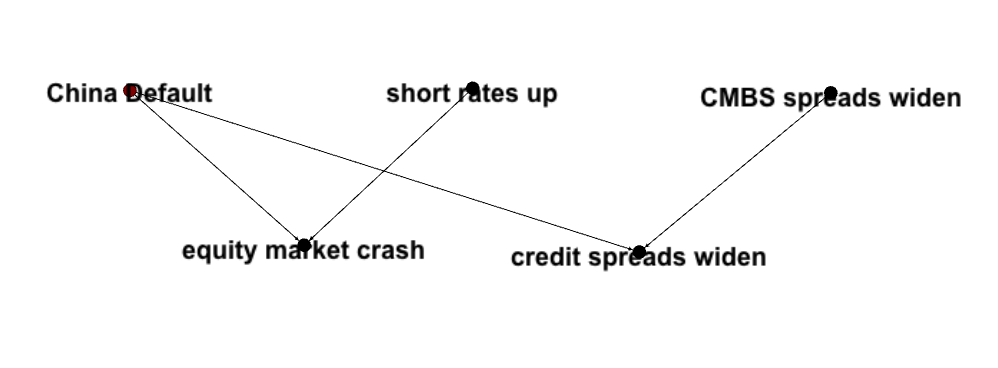

In [81]:
Image('China defaults example.png')

In [82]:
d1_prob = np.array([0.9,0.1])
d2_prob = np.array([0.5,0.5])
d3_prob = np.array([0.5,0.5])
e1_prob = np.array([[[0.9,0.1],[0.7,0.3]],[[0.2,0.8],[0.05,0.95]]])
e2_prob = np.array([[[0.9,0.1],[0.4,0.6]],[[0.35,0.65],[0.15,0.85]]])


In [83]:
E1_prob = theano.shared(e1_prob)
E1_0 = E1_prob[D1,D2]
E1_0

Subtensor{int64, int64}.0

In [84]:
with pm.Model() as model:
    
    D1 = pm.Categorical('D1',p=d1_prob)
    D2 = pm.Categorical('D2',p=d2_prob)
    D3 = pm.Categorical('D3',p=d3_prob)    
    
    E1_prob = theano.shared(e1_prob)
    E1_0 = E1_prob[D1,D2]
    E1 = pm.Categorical('E1',p=E1_0)
    
    E2_prob = theano.shared(e2_prob)
    E2_0 = E2_prob[D1,D3]
    E2 = pm.Categorical('E2',p=E2_0)

### Specify observation in .observed = []###

In [77]:
with model:
    E1.observed = [0]
    trace = pm.sample(10000)

Assigned BinaryGibbsMetropolis to D1
Assigned BinaryGibbsMetropolis to D2
Assigned BinaryGibbsMetropolis to D3
Assigned BinaryGibbsMetropolis to E1
Assigned BinaryGibbsMetropolis to E2
100%|███████████████████████████████████████████████████████████████████████████| 10500/10500 [00:37<00:00, 278.28it/s]


In [78]:
print(pm.summary(trace,varnames=['D1','D2','D3','E1','E2'],start=10))


D1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.094            0.292            0.004            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          0.000          0.000          1.000


D2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.503            0.500            0.002            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          1.000          1.000          1.000


D3:

  Mean             SD               MC Error         95% HPD interval
  ----------------------------------

### Adding normal random variable###

In [58]:
c1_mu, c1_sd = np.array([[10, 14],  # 2 choices inherit
                         [2 , 2 ]])

with model:
    C1 = pm.Normal('C1', mu = 10+4*D1,sd = 2)

In [59]:
with model:
    trace = pm.sample(1000)

Assigned BinaryGibbsMetropolis to D1
Assigned BinaryGibbsMetropolis to D2
Assigned BinaryGibbsMetropolis to D3
Assigned BinaryGibbsMetropolis to E1
Assigned BinaryGibbsMetropolis to E2
Assigned NUTS to C1
100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:10<00:00, 147.67it/s]


In [76]:
print(pm.summary(trace,varnames=['D1','D2'],start=10))


D1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.105            0.307            0.003            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          0.000          0.000          1.000


D2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.499            0.500            0.002            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          0.000          1.000          1.000

None
